In [44]:
#Import drive 
from google.colab import drive
dr = drive.mount('/content/drive')

# Data Manipulation
import pandas as pd
import numpy as np
import re

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split

# Machine Learning Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor 

# Model Evaluation
from sklearn.metrics import mean_squared_error, r2_score

# Feature Selection
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score, precision_score, recall_score
# Cross-validation
from sklearn.model_selection import cross_val_score

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

#Intialize encoder



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
drive_path = '/content/drive/MyDrive/Final Project Computer Science 2023/project/'
df_file = 'final_stock_file.csv'
df = pd.read_csv(drive_path+df_file)
df

,transaction_date,trade_date,ticker,company_name,owner_name,Title,transaction_type,last_price,Qty,shares_held,Owned,Value,stock_value,30_days_later
0,2022-01-12 16:53:26,2022-01-11,ADSK,"Autodesk, Inc.",Hope Stephen W.,"VP, Chief Accounting Officer",S - Sale,260.47,-197,"3,755",-5%,"-$51,313",270.630005,251.339996
1,2022-01-11 19:26:43,2022-01-07,IBKR,"Interactive Brokers Group, Inc.",Frank Thomas Aj,CIO,S - Sale,76.51,"-32,897","394,861",-8%,"-$2,516,911",76.679276,72.449654
2,2022-01-03 10:01:05,2021-12-30,LLY,Eli Lilly & Co,Lilly Endowment Inc,10%,S - Sale,279.55,"-3,614","107,463,810",0%,"-$1,010,276",272.629761,241.015518
3,2022-01-10 16:09:20,2022-01-07,HSY,Hershey Co,Reiman Jason,SVP Chief Supply Chain Officer,S - Sale,196.45,-150,"12,740",-1%,"-$29,468",191.524307,198.301239
4,2022-01-31 16:15:08,2022-01-28,SAFE,Safehold Inc.,Istar Inc.,10%,P - Purchase,59.09,"+16,920","36,739,336",0%,"+$999,859",57.652042,60.336269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2057,2023-01-09 16:38:38,2023-01-06,HSKA,Heska Corp,Wilson Kevin S.,"CEO, Pres",P - Purchase,58.62,"+11,018","477,578",+2%,"+$645,926",62.169998,88.480003
2058,2023-01-13 16:20:21,2023-01-12,TEAM,Atlassian Corp,Farquhar Scott,"Co-CEO, Co-Founder, 10%",S - Sale,144.00,"-8,614","465,156",-2%,"-$1,240,432",146.479996,172.229996
2059,2023-01-31 16:04:58,2023-01-27,FOXF,Fox Factory Holding Corp,Dennison Michael C.,CEO,S - Sale,115.00,"-7,500","62,701",-11%,"-$862,500",114.279999,112.139999
2060,2023-01-26 19:48:32,2023-01-25,TEAM,Atlassian Corp,Farquhar Scott,"Co-CEO, Co-Founder, 10%",S - Sale,148.18,"-8,614","396,244",-2%,"-$1,276,438",151.929993,170.630005


In [46]:

# Infer the data types of the columns
df = df.infer_objects()

# Check the data types of the columns
print(df.dtypes)


transaction_date     object
trade_date           object
ticker               object
company_name         object
owner_name           object
Title                object
transaction_type     object
last_price          float64
Qty                  object
shares_held          object
Owned                object
Value                object
stock_value         float64
30_days_later       float64
dtype: object


In [47]:
train_data, test_data = train_test_split(df, test_size=0.2)

train_data

,transaction_date,trade_date,ticker,company_name,owner_name,Title,transaction_type,last_price,Qty,shares_held,Owned,Value,stock_value,30_days_later
1336,2022-08-26 20:20:47,2022-08-25,CTLT,"Catalent, Inc.",Maselli Alessandro,"Pres, CEO",S - Sale,103.04,"-4,646","41,190",-10%,"-$478,724",104.199997,76.070000
622,2022-04-28 21:46:49,2022-04-27,TSLA,"Tesla, Inc.",Musk Elon,"CEO, 10%",S - Sale,898.00,"-345,601","168,193,251",0%,"-$310,350,358",293.836670,235.910004
1250,2022-08-04 16:24:34,2022-08-03,SAM,Boston Beer Co Inc,O'Boyle Carolyn L.,Chief People Officer,S - Sale,381.73,-251,"2,593",-9%,"-$95,814",378.329987,337.290009
1718,2023-01-24 16:37:51,2023-01-23,AKAM,Akamai Technologies Inc,Leighton F Thomson,CEO,P - Purchase,87.79,+571,"2,355,858",0%,"+$50,131",89.190002,76.400002
661,2022-04-05 16:33:53,2022-04-04,RMD,Resmed Inc,Pendarvis David,Chief Administrative Officer,S - Sale,246.60,"-1,544","111,403",-1%,"-$380,750",245.710007,196.419998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,2022-04-27 18:23:32,2022-04-25,SMAR,Smartsheet Inc,Barker Geoffrey T,Dir,S - Sale,50.44,"-2,250","349,006",-1%,"-$113,479",50.810001,33.470001
1464,2022-09-08 14:09:34,2022-09-07,SXI,Standex International Corp/de/,Sarcevic Ademir,"VP, CFO, Treasurer",S - Sale,85.89,"-1,592","17,575",-8%,"-$136,741",86.860001,86.059998
1015,2022-05-25 16:23:28,2022-05-24,IART,Integra Lifesciences Holdings Corp,Evoli Lisa,"EVP,CHRO",S - Sale,59.85,-250,"20,811",-1%,"-$14,963",60.099998,54.220001
1259,2022-08-02 20:45:40,2022-07-19,CNXC,Concentrix Corp,Silver Star Developments Ltd,10%,S - Sale,125.00,"-524,691","4,415,535",-11%,"-$65,586,375",129.210007,133.630005


In [48]:
def check_null_values(df):
    # Get the names of columns that have null values
    null_cols = df.columns[df.isnull().any()]
    # If any columns have null values, print their names
    if len(null_cols) > 0:
        print("The following columns contain null values:")
        for col in null_cols:
            print(col)
    # If no columns have null values, print a message indicating this
    else:
        print("No columns contain null values.")


def check_empty_values(df):
    # Get the names of columns that have empty values
    empty_cols = [col for col in df.columns if df[col].astype(str).str.strip().empty]
    # If any columns have empty values, print their names
    if len(empty_cols) > 0:
        print("The following columns contain empty values:")
        for col in empty_cols:
            print(col)
    # If no columns have empty values, print a message indicating this
    else:
        print("No columns contain empty values.")


def check_nan_values(df):
    # Check if each column is numerical
    num_cols = [col for col in df.columns if pd.api.types.is_numeric_dtype(df[col])]
    # Get the names of columns that have NaN values
    nan_cols = [col for col in num_cols if pd.to_numeric(df[col], errors='coerce').isnull().any()]
    # If any columns have NaN values, print their names
    if len(nan_cols) > 0:
        print("The following numerical columns contain NaN values:")
        for col in nan_cols:
            print(col)
    # If no columns have NaN values, print a message indicating this
    else:
        print("No numerical columns contain NaN values.")

def replace_missing_values(df):
    """
    Replace missing (NaN) values in a DataFrame with appropriate values based on data type of the column.
    
    Parameters:
        - df (pd.DataFrame): Input DataFrame
        
    Returns:
        - pd.DataFrame: DataFrame with missing values replaced
    """
    null_columns = df.columns[df.isnull().sum() > 0]
    for column in null_columns:
        if df[column].dtype == 'float64' or df[column].dtype == 'int64':
            df[column].fillna(df[column].mean(), inplace=True)
        else:
            df[column].fillna(df[column].mode().iloc[0], inplace=True)
    return df



In [49]:
def encode_values(column_dict,column):
    unique_values = column.unique()  # Get unique values in the column
    num_variants = len(unique_values)  # Get the number of unique values
    unique_values = list(enumerate(unique_values)) 
    for number,value in unique_values:
        column_dict[value]=number
    return column_dict



def replace_items(column, dictionary):
    return column.replace(dictionary)


In [50]:
encoded_values_ticker= encode_values(dict(),df['ticker'])
encoded_values_owner_name = encode_values(dict(),df['owner_name'])

In [51]:
check_null_values(train_data)
check_empty_values(train_data)
check_nan_values(train_data)


No columns contain null values.
No columns contain empty values.
No numerical columns contain NaN values.


In [52]:
# Function to replace 'P' with 1 and 'S' with 0 in a string column
def replace_p_s_with_1_0(value):
    if 'P' in value:
        return 1
    elif 'S' in value:
        return 0
# Define a function for hashing the company names
def hash_trick_binary(s, num_bits=16):
    """
    Hashing trick function to encode company names to binary representation
    Args:
        s (str): Company name
        num_bits (int): Number of bits for the binary representation (default: 16)
    Returns:
        str: Binary representation of the hashed company name
    """
    hashed_value = hash(s)  # Use the built-in hash function to hash the company name
    binary_value = format(hashed_value, '0{}b'.format(num_bits))  # Convert to binary representation
    return binary_value

def one_hot_encode_column(df, col_name):
    """
    This function takes a pandas dataframe and a column name, one hot encodes the column, and returns the resulting dataframe.

    Arguments:
    df -- pandas dataframe
    col_name -- string, the name of the column to be one hot encoded

    Returns:
    pandas dataframe -- the original dataframe with the one hot encoded column added and the original column removed
    """

    # Select the column to be one hot encoded
    col = df[col_name]

    # Apply one hot encoding to the column
    one_hot_encoded_col = pd.get_dummies(col, prefix=col_name)

    # Concatenate the original dataframe with the one hot encoded column
    df = pd.concat([df, one_hot_encoded_col], axis=1)

    # Remove the original column
    df.drop(col_name, axis=1, inplace=True)

    return df


In [53]:
df['Title']

0         VP, Chief Accounting Officer
1                                  CIO
2                                  10%
3       SVP Chief Supply Chain Officer
4                                  10%
                     ...              
2057                         CEO, Pres
2058           Co-CEO, Co-Founder, 10%
2059                               CEO
2060           Co-CEO, Co-Founder, 10%
2061                               Dir
Name: Title, Length: 2062, dtype: object

In [54]:
def clean_array(arr):
    return [word.strip().replace('co-', '') for word in arr]

In [55]:
def find_initials(s):
    return ''.join([x[0] for x in s.split(' ')])

#It's for a series object NOT for array
def replace_with_initials(s,in_string):
    new_s = s.copy()
    for i, string in s.items():            
            if in_string in string:
                new_s[i] = find_initials(string)
    return new_s

def replace_to_cob(s):
    new_s = s.copy()
    for i, string in s.items():
    # Check if string contains "chair, exec cob" (case insensitive)
       if 'chair' in string or 'cob' in string:
               new_s[i] = 'cob'
    return new_s


In [56]:
# Split the strings on commas and create a list of values for each cell
train_data['Title'] = train_data['Title'].str.lower()
train_data['Title'] = train_data['Title'].str.split(',')
#Clean_array will remove the co- start from each title
train_data['Title'] = train_data['Title'].apply(clean_array)
unique_values = train_data['Title'].explode()
print(len(unique_values.value_counts()))
unique_values = replace_with_initials(unique_values,'chief')
unique_values = replace_to_cob(unique_values)
unique_values = unique_values.value_counts()
print(unique_values[:50])


299
dir                             449
cob                             216
ceo                             202
10%                             184
evp                             162
pres                            130
cfo                             122
svp                              94
gc                               86
cao                              75
coo                              65
vp                               38
founder                          36
cto                              28
cro                              22
cco                              22
secretary                        21
see remarks                      21
cmo                              21
cpo                              20
clo                              19
treasurer                        16
chro                             16
cso                              15
cio                              15
cl                               14
controller                       11
d                       

In [57]:
def replace_to_initials_for_array(string, df):
    # Loop through the columns of the DataFrame
    for i, value in df.items():
        new_array = []
        # Loop through the values in the column
        for v in value:
            if string in v:
                # Replace string with initials using the find_initials() function
                new_array.append(find_initials(v))
            else:
                new_array.append(v)
        # Update the column in the DataFrame with the modified values
        df[i] = new_array

def replace_to_string_for_array(string, df, optional=None, not_optional=None):
    if optional is None and not_optional is None:
        # If neither optional nor not_optional are provided, replace string with string
        # in all values of the DataFrame
        for i, value in df.items():
            df = df.apply(lambda v: string if string in v else v)
    elif not_optional is None:
        # If not_optional is not provided, replace string with string in values that
        # contain either string or optional
        for i, value in df.items():
            new_array = []
            # Loop through the values in the column
            for v in value:
                if string in v or optional in v:
                    new_array.append(string)
                else:
                    new_array.append(v)
            # Update the column in the DataFrame with the modified values
            df[i] = new_array
    elif optional is None:
        # If optional is not provided, replace string with string in values that
        # contain string but not not_optional
        for i, value in df.items():
            new_array = []
            # Loop through the values in the column
            for v in value:
                if string in v and not_optional != v:
                    new_array.append(string)
                else:
                    new_array.append(v)
            # Update the column in the DataFrame with the modified values
            df[i] = new_array


In [58]:
replace_to_string_for_array('cob',df=train_data['Title'],optional='chair')
replace_to_string_for_array('pres',df=train_data['Title'])
replace_to_string_for_array('vp',df=train_data['Title'],not_optional='evp')
replace_to_initials_for_array('chief',train_data['Title'])


<ipython-input-57-756befde8387>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = new_array
<ipython-input-57-756befde8387>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = new_array
<ipython-input-57-756befde8387>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = new_array


In [59]:
ranks = {
    'founder': 1,
    'cob': 2,
    'ceo': 2,
    'president':3,
    'pres': 3,
    'evp': 3,
    'coo': 4,
    'cfo': 4,
    'cto': 4,
    'cio': 4,
    'chro': 4,
    'gc': 4,
    'vp': 5,
    'controller': 5,
    'cmo': 5,
    'cao': 5,
    'treasurer': 5,
    'secretary': 5,
    '10%': 5,
    'dir':5
    }



In [60]:
# Function to replace titles in an array with their corresponding ranks from the dictionary,
# and return the minimum rank among them. If title not found in dictionary, default rank is 5.
def replace_title_with_rank(title_array):
   return min([ranks.get(title, 5) if title in ranks else 5 for title in title_array]) # Use 5 as default value if title not found in dictionary


In [61]:
train_data['Title'] = train_data['Title'].apply(replace_title_with_rank)

In [62]:
train_data['transaction_type'] = train_data['transaction_type'].apply(replace_p_s_with_1_0)
train_data['ticker'] = replace_items(train_data['ticker'],encoded_values_ticker)
train_data['owner_name'] = replace_items(train_data['owner_name'],encoded_values_owner_name)


In [63]:
columns_to_drop = ['transaction_date', 'trade_date', 'company_name']
train_data=train_data.drop(columns_to_drop, axis=1)

In [64]:
train_data['Qty']= train_data['Qty'].str.replace(",", "").astype(float)
train_data['shares_held']= train_data['shares_held'].str.replace(",", "").astype(int)
train_data["Owned"] = train_data["Owned"].str.replace("%", "").replace("New",0)
train_data['Owned'] = train_data['Owned'].str.replace('>',"").astype(float)
# Divide by 100
train_data["Owned"] = train_data["Owned"]/100
train_data['Value'] = train_data['Value'].str.replace("$", "")
train_data['Value'] = train_data['Value'].str.replace(",", "").astype(int)

<ipython-input-64-72f3c9a12d17>:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  train_data['Value'] = train_data['Value'].str.replace("$", "")


In [65]:
train_data

,ticker,owner_name,Title,transaction_type,last_price,Qty,shares_held,Owned,Value,stock_value,30_days_later
1336,173,918,2,0,103.04,-4646.0,41190,-0.10,-478724,104.199997,76.070000
622,11,461,2,0,898.00,-345601.0,168193251,0.00,-310350358,293.836670,235.910004
1250,492,859,5,0,381.73,-251.0,2593,-0.09,-95814,378.329987,337.290009
1718,151,1063,2,1,87.79,571.0,2355858,0.00,50131,89.190002,76.400002
661,295,486,5,0,246.60,-1544.0,111403,-0.01,-380750,245.710007,196.419998
...,...,...,...,...,...,...,...,...,...,...,...
723,115,355,5,0,50.44,-2250.0,349006,-0.01,-113479,50.810001,33.470001
1464,542,992,4,0,85.89,-1592.0,17575,-0.08,-136741,86.860001,86.059998
1015,403,682,3,0,59.85,-250.0,20811,-0.01,-14963,60.099998,54.220001
1259,202,864,5,0,125.00,-524691.0,4415535,-0.11,-65586375,129.210007,133.630005


In [66]:
check_null_values(train_data)
check_empty_values(train_data)
check_nan_values(train_data)


The following columns contain null values:
Owned
No columns contain empty values.
The following numerical columns contain NaN values:
Owned


In [67]:
train_data = replace_missing_values(train_data)
train_data

,ticker,owner_name,Title,transaction_type,last_price,Qty,shares_held,Owned,Value,stock_value,30_days_later
1336,173,918,2,0,103.04,-4646.0,41190,-0.10,-478724,104.199997,76.070000
622,11,461,2,0,898.00,-345601.0,168193251,0.00,-310350358,293.836670,235.910004
1250,492,859,5,0,381.73,-251.0,2593,-0.09,-95814,378.329987,337.290009
1718,151,1063,2,1,87.79,571.0,2355858,0.00,50131,89.190002,76.400002
661,295,486,5,0,246.60,-1544.0,111403,-0.01,-380750,245.710007,196.419998
...,...,...,...,...,...,...,...,...,...,...,...
723,115,355,5,0,50.44,-2250.0,349006,-0.01,-113479,50.810001,33.470001
1464,542,992,4,0,85.89,-1592.0,17575,-0.08,-136741,86.860001,86.059998
1015,403,682,3,0,59.85,-250.0,20811,-0.01,-14963,60.099998,54.220001
1259,202,864,5,0,125.00,-524691.0,4415535,-0.11,-65586375,129.210007,133.630005


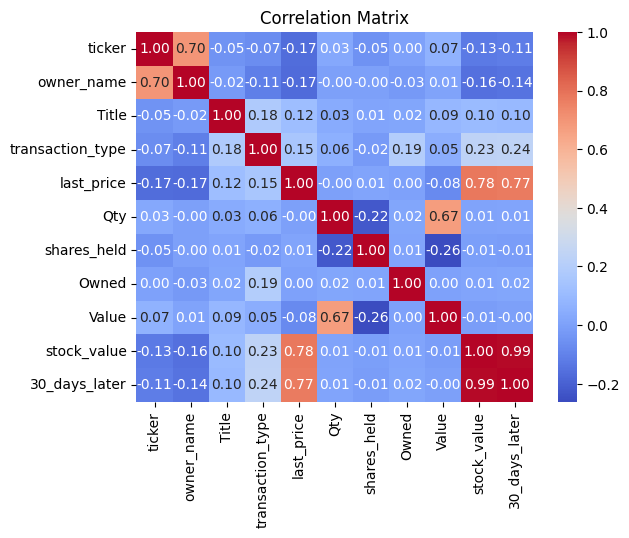

In [68]:
# Compute the correlation matrix
corr_matrix = train_data.corr()

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [69]:
train_data

,ticker,owner_name,Title,transaction_type,last_price,Qty,shares_held,Owned,Value,stock_value,30_days_later
1336,173,918,2,0,103.04,-4646.0,41190,-0.10,-478724,104.199997,76.070000
622,11,461,2,0,898.00,-345601.0,168193251,0.00,-310350358,293.836670,235.910004
1250,492,859,5,0,381.73,-251.0,2593,-0.09,-95814,378.329987,337.290009
1718,151,1063,2,1,87.79,571.0,2355858,0.00,50131,89.190002,76.400002
661,295,486,5,0,246.60,-1544.0,111403,-0.01,-380750,245.710007,196.419998
...,...,...,...,...,...,...,...,...,...,...,...
723,115,355,5,0,50.44,-2250.0,349006,-0.01,-113479,50.810001,33.470001
1464,542,992,4,0,85.89,-1592.0,17575,-0.08,-136741,86.860001,86.059998
1015,403,682,3,0,59.85,-250.0,20811,-0.01,-14963,60.099998,54.220001
1259,202,864,5,0,125.00,-524691.0,4415535,-0.11,-65586375,129.210007,133.630005


Test size: 0.1


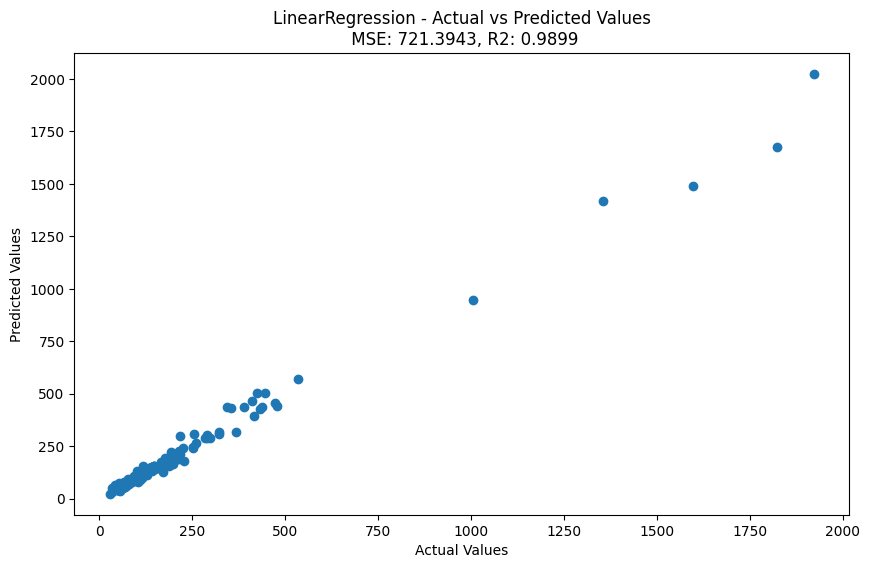

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.1921e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.52635e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.58972e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.25785e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill

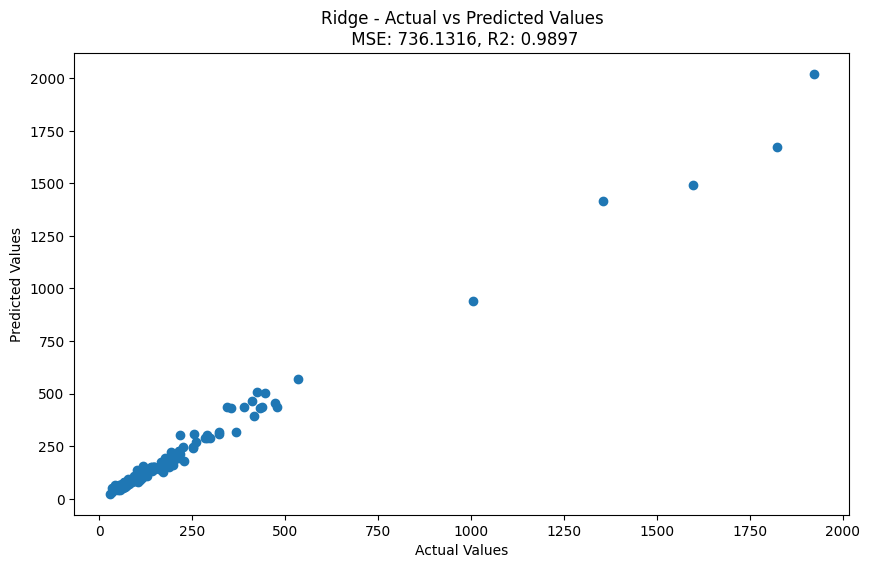

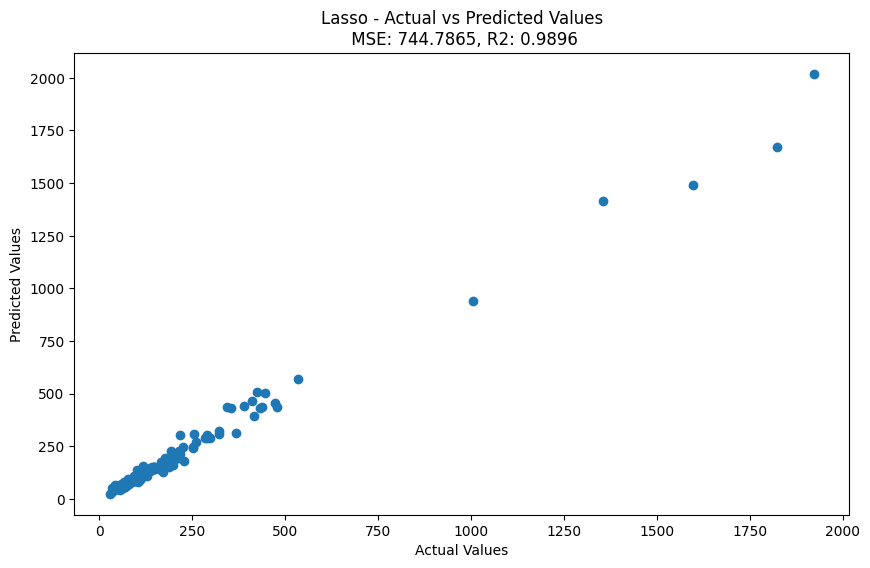

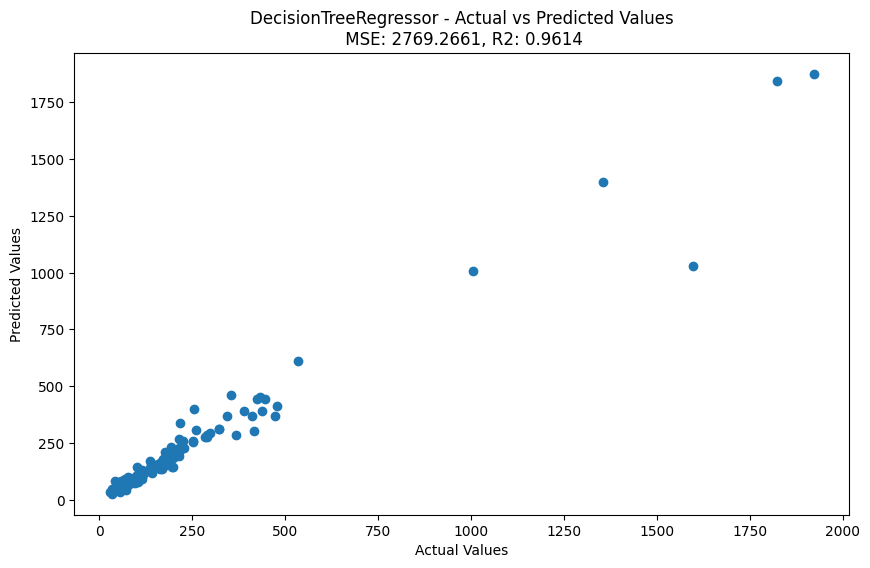

Test size: 0.15


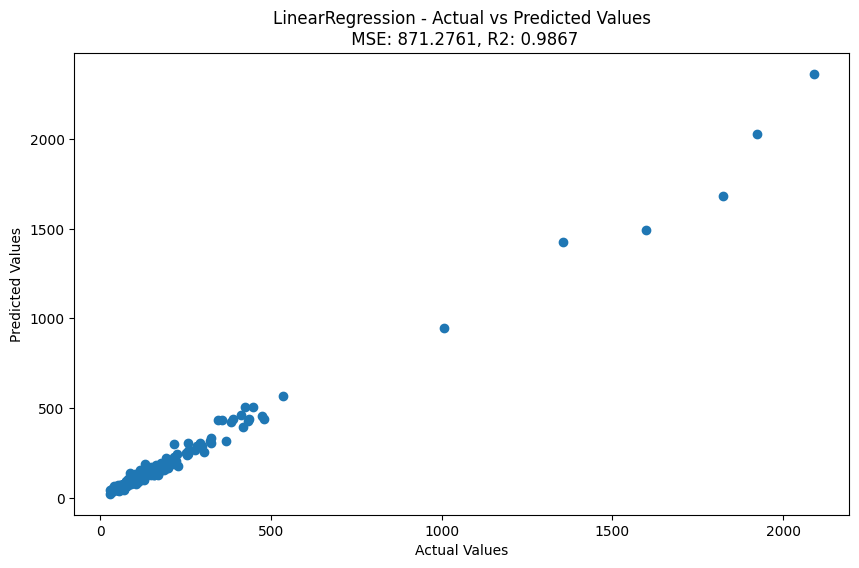

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.79884e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.0156e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.82335e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.91709e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill

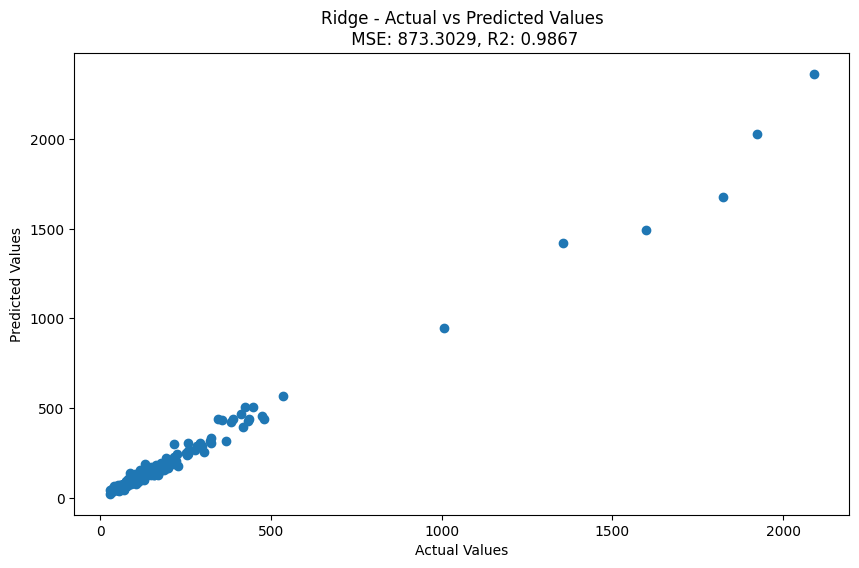

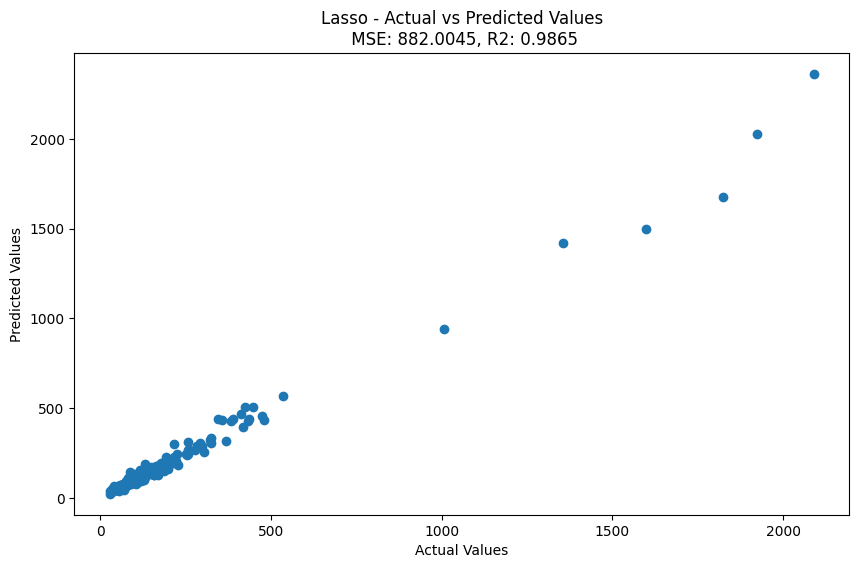

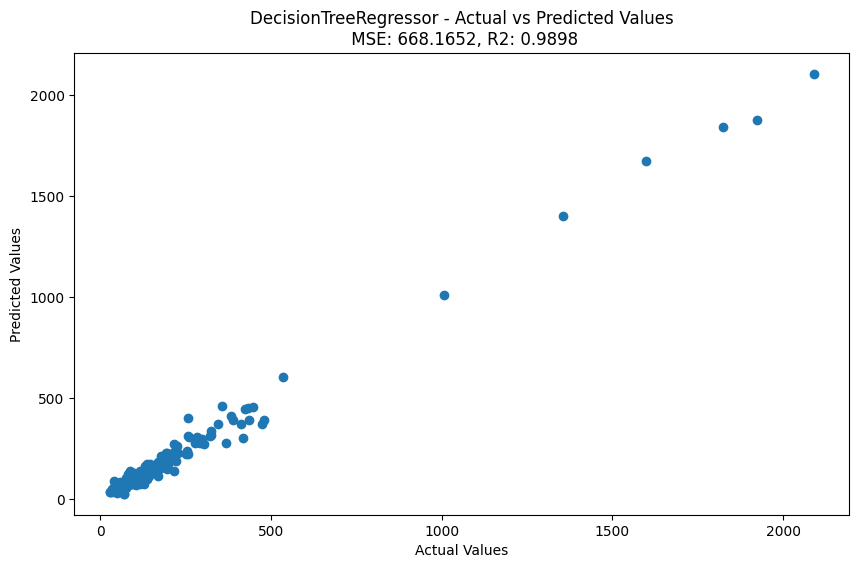

Test size: 0.2


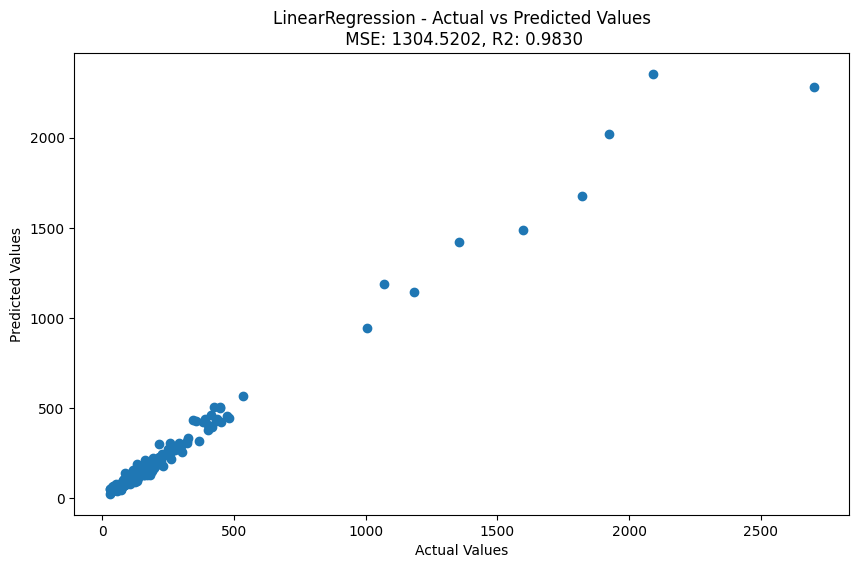

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.33997e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.55553e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.2572e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.56183e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill

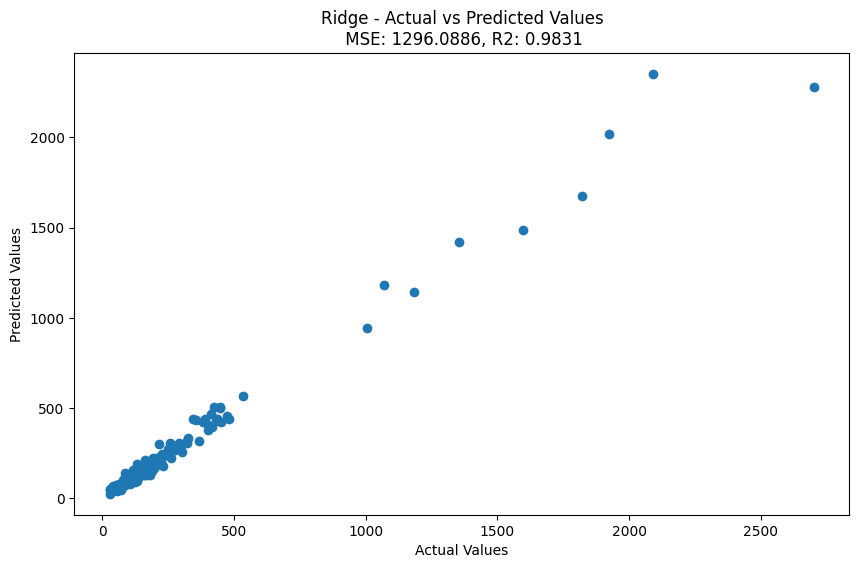

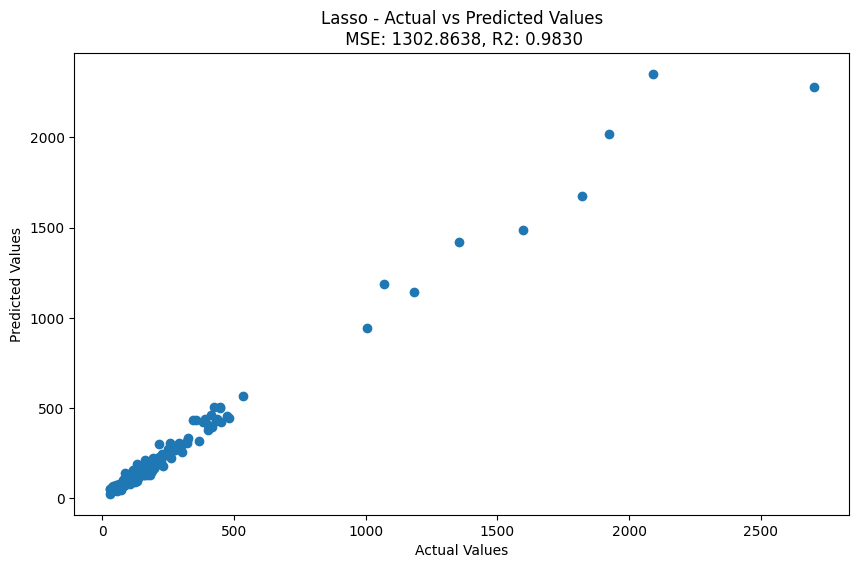

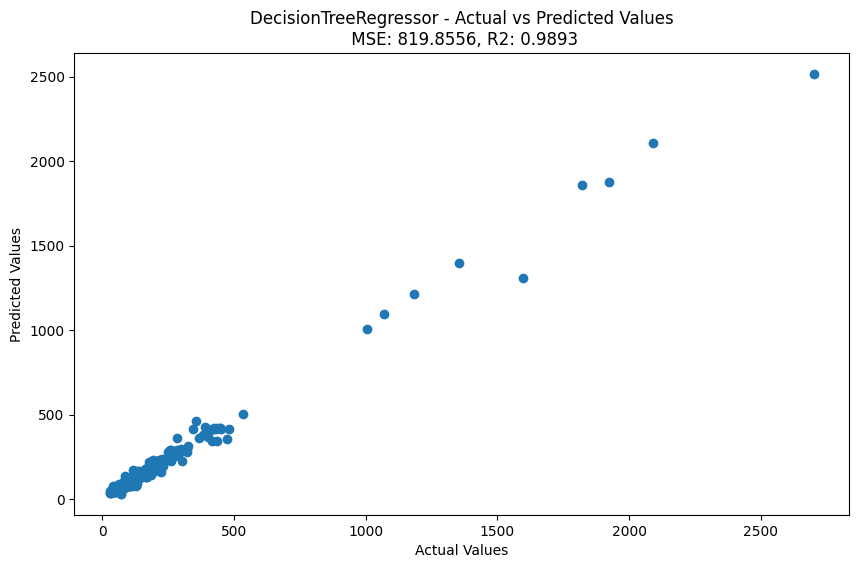

Test size: 0.25


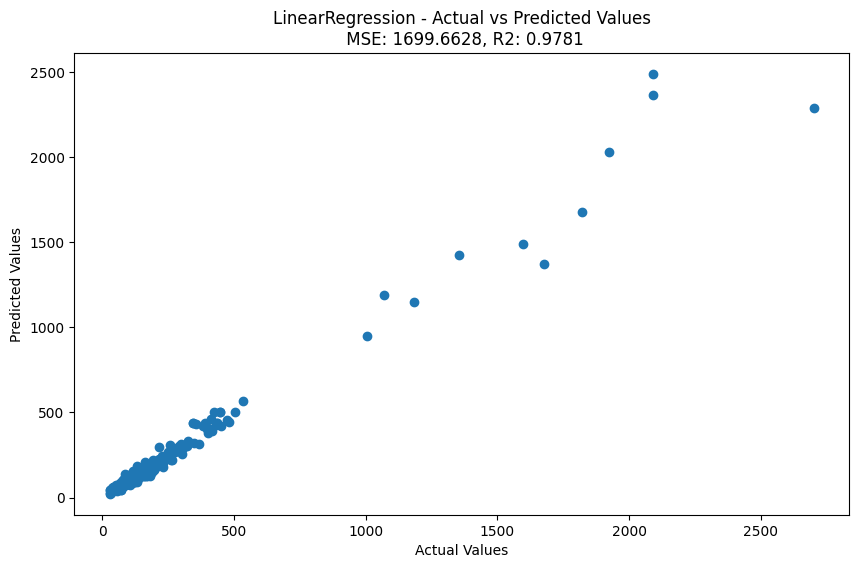

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.97284e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.22669e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.55779e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.74054e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Il

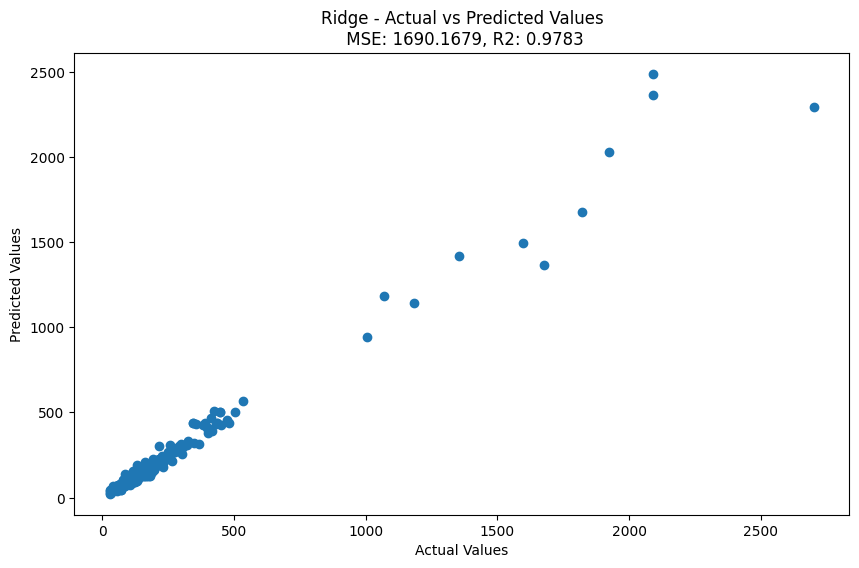

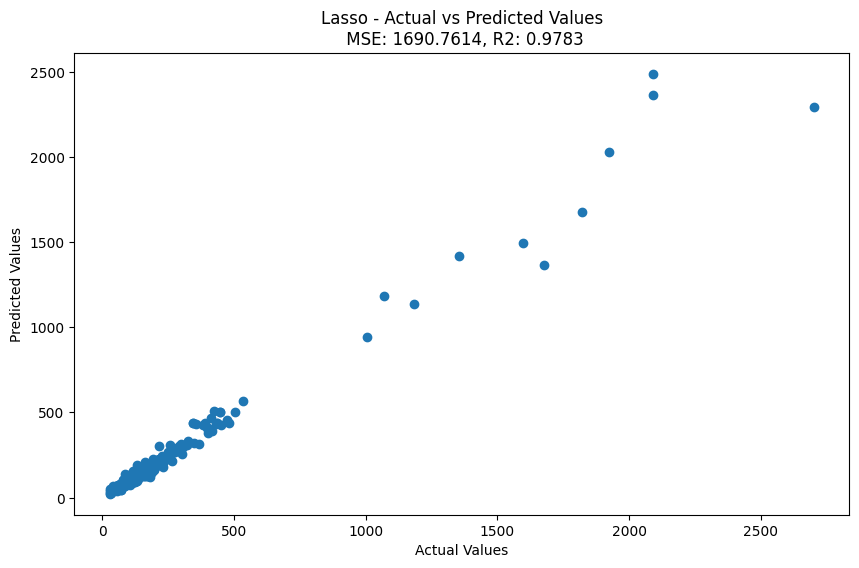

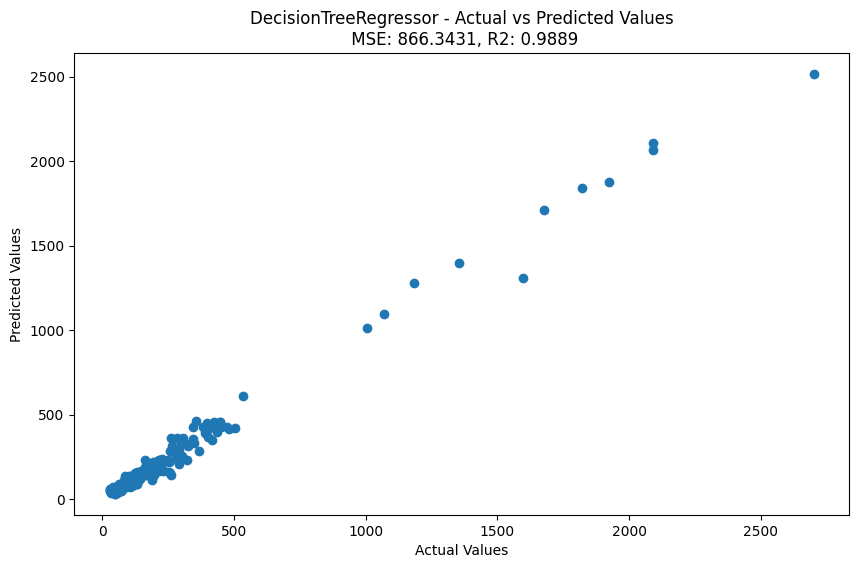

In [70]:
# Define the parameter grid for grid search for Ridge and Lasso regression
param_grid_ridge = {'alpha': np.logspace(-3, 3, 7)} # alpha values ranging from 0.001 to 1000
param_grid_lasso = {'alpha': np.logspace(-3, 3, 7)} # alpha values ranging from 0.001 to 1000

X = train_data.drop('30_days_later', axis=1)  # Replace 'target' with the column name of your target variable
y = train_data['30_days_later']  # Replace 'target' with the column name of your target variable

# Create an array of regression models
models = [LinearRegression(), Ridge(), Lasso(),DecisionTreeRegressor()]

# Define different test sizes
test_sizes = [0.10, 0.15, 0.2, 0.25]

# Create a dictionary to store model information
model_info = {}

# Loop through each test size
for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    print('Test size:', test_size)
    
    # Loop through each model
    for model in models:
        model_name = model.__class__.__name__

        # Perform grid search with cross-validation
        if model_name == 'LinearRegression':
            param_grid = {}
        elif model_name == 'Ridge':
            param_grid = param_grid_ridge
        elif model_name == 'Lasso':
            param_grid = param_grid_lasso
        elif model_name == 'DecisionTreeRegressor':
          param_grid = {}

        grid_search = GridSearchCV(model, param_grid, cv=5)
        grid_search.fit(X_train, y_train)

        # Get the best hyperparameters
        best_params = grid_search.best_params_
        best_alpha = best_params['alpha'] if 'alpha' in best_params else None

        # Train the model with the best hyperparameters
        model_best = model.__class__(**best_params) if best_alpha else model.__class__()
        trained_model=model_best.fit(X_train, y_train)
        
        # Make predictions on the test set
        y_pred = model_best.predict(X_test)

        # Calculate metrics
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        # Store model information in the dictionary
        model_info[model_name] = {
            'best_params': best_params,
            'best_alpha': best_alpha,
            'trained_model':trained_model,
            'model': model_best,
            'X_train': X_train,
            'y_train': y_train,
            'X_test': X_test,
            'y_test': y_test,
            'y_pred': y_pred,
            'mse': mse,
            'r2': r2
        }
        
        # Plot the results
        plt.figure(figsize=(10, 6))
        plt.scatter(y_test, y_pred)
        plt.xlabel('Actual Values')
        plt.ylabel('Predicted Values')
        plt.title('{} - Actual vs Predicted Values\n MSE: {:.4f}, R2: {:.4f}'.format(model_name, mse, r2))
        plt.show()

# Access model information from the dictionary
# Example usage:
# best_params_ridge = model_info['Ridge']['best_params']


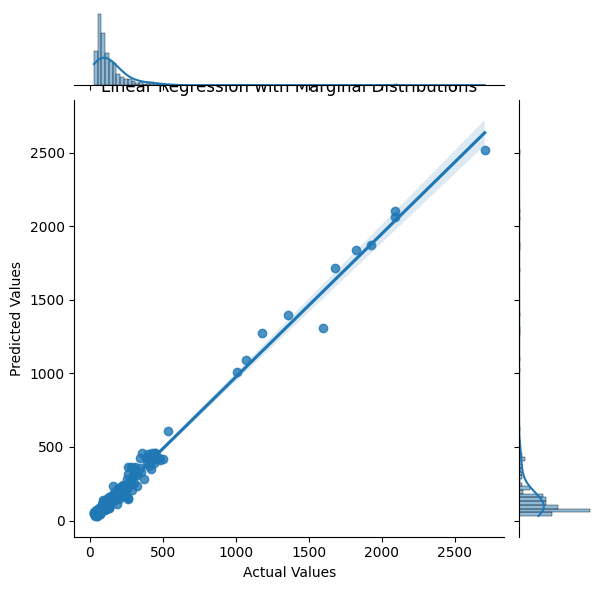

In [71]:
data = {'Actual': y_test, 'Predicted': y_pred}
prediction = pd.DataFrame(data)

sns.jointplot(x='Actual', y='Predicted', data=prediction, kind='reg')

# Set labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression with Marginal Distributions')

# Show the plot
plt.show()


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.62174e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.92413e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.20821e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.08241e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Il

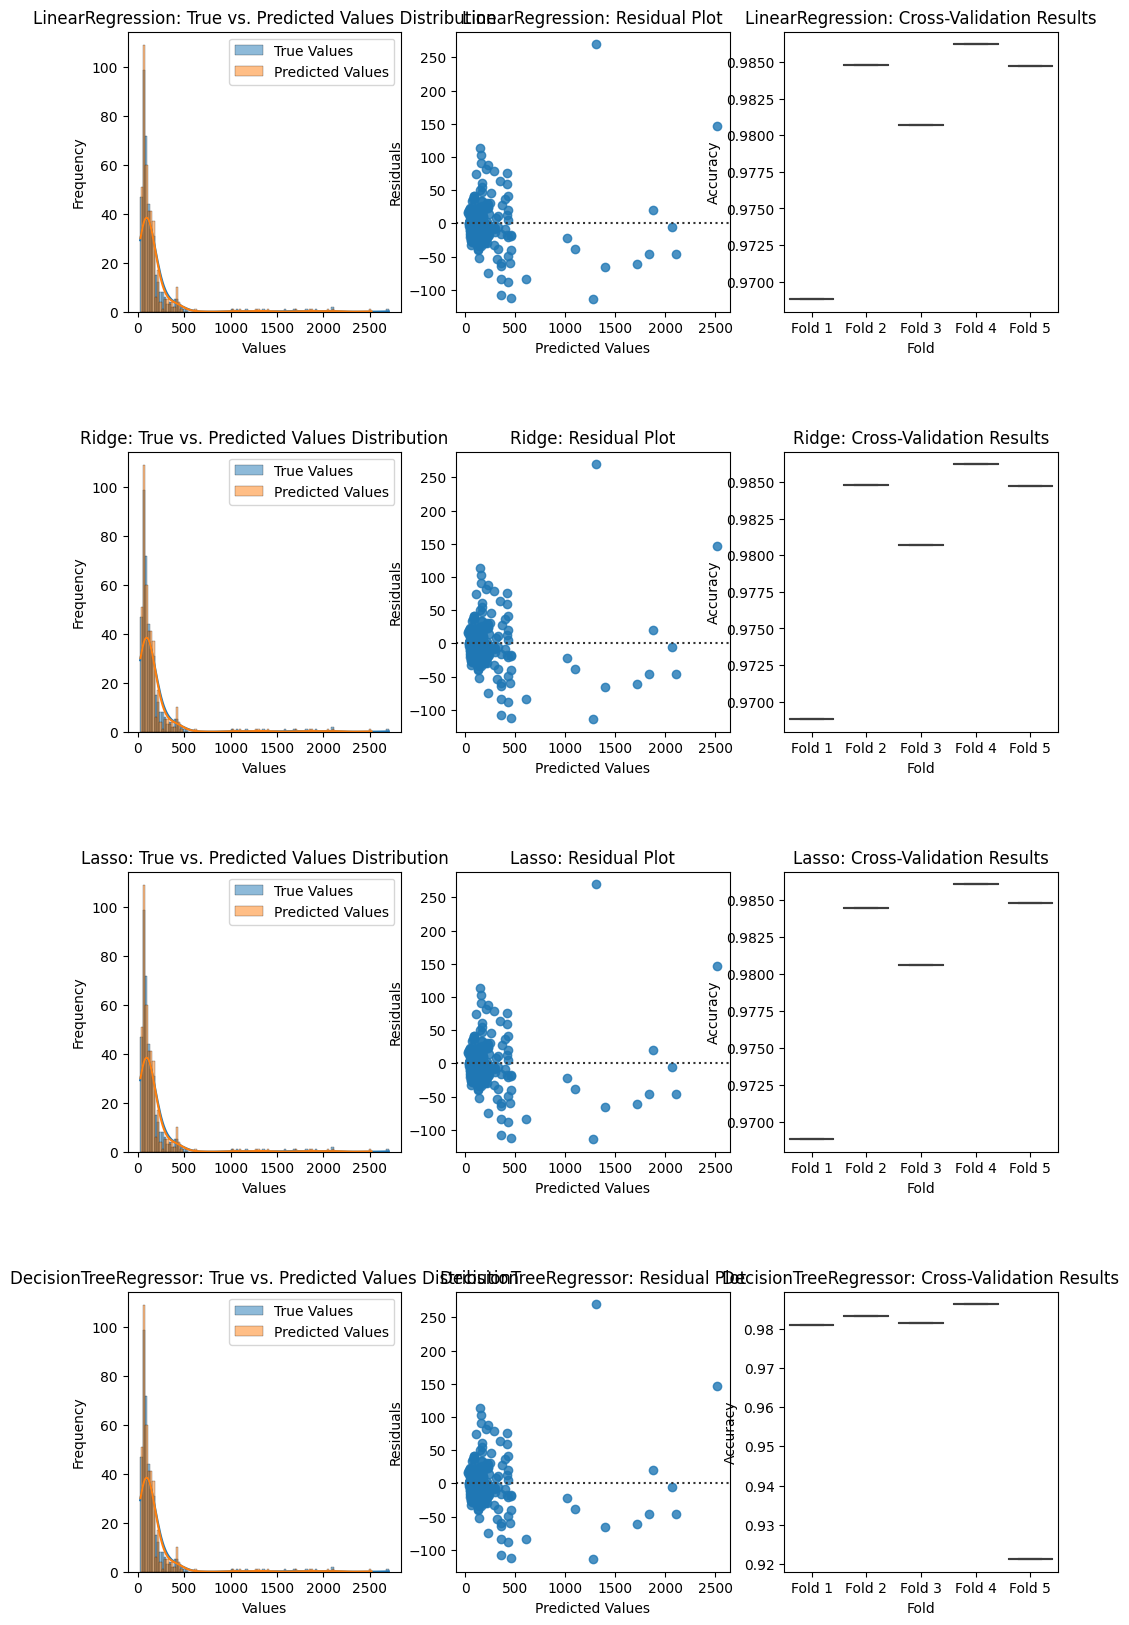

In [72]:
# Set up the subplots
n_models = len(models)  # Replace 'models' with your array of models
fig, axes = plt.subplots(n_models, 3, figsize=(12, n_models*5))  # 3 columns for histograms, residual plots, and boxplots
fig.subplots_adjust(hspace=0.5)  # Add vertical space between subplots

# Loop over the models and create plots
for i, model in enumerate(models):  # Replace 'models' with your array of models
    model_name = type(model).__name__

    # Create histogram of true and predicted values
    sns.histplot(y_test, kde=True, label='True Values', ax=axes[i, 0])
    sns.histplot(y_pred, kde=True, label='Predicted Values', ax=axes[i, 0])
    axes[i, 0].set_xlabel('Values')
    axes[i, 0].set_ylabel('Frequency')
    axes[i, 0].set_title(f'{model_name}: True vs. Predicted Values Distribution')
    axes[i, 0].legend()

    # Create residual plot
    sns.residplot(x=y_pred, y=y_test, ax=axes[i, 1])
    axes[i, 1].set_xlabel('Predicted Values')
    axes[i, 1].set_ylabel('Residuals')
    axes[i, 1].set_title(f'{model_name}: Residual Plot')

    # Perform cross-validation and get results
    scores = cross_val_score(model, X, y, cv=5)  # Replace 'model', 'X', and 'y' with your specific model, features, and target variable
    fold_labels = [f"Fold {i+1}" for i in range(len(scores))]

    # Create boxplot to visualize cross-validation results
    sns.boxplot(x=fold_labels, y=scores, ax=axes[i, 2])
    axes[i, 2].set_xlabel("Fold")
    axes[i, 2].set_ylabel("Accuracy")  # Replace with appropriate evaluation metric
    axes[i, 2].set_title(f'{model_name}: Cross-Validation Results')

# Show the plots
plt.show()


Text(0.5, 1.0, 'Linear Regression')

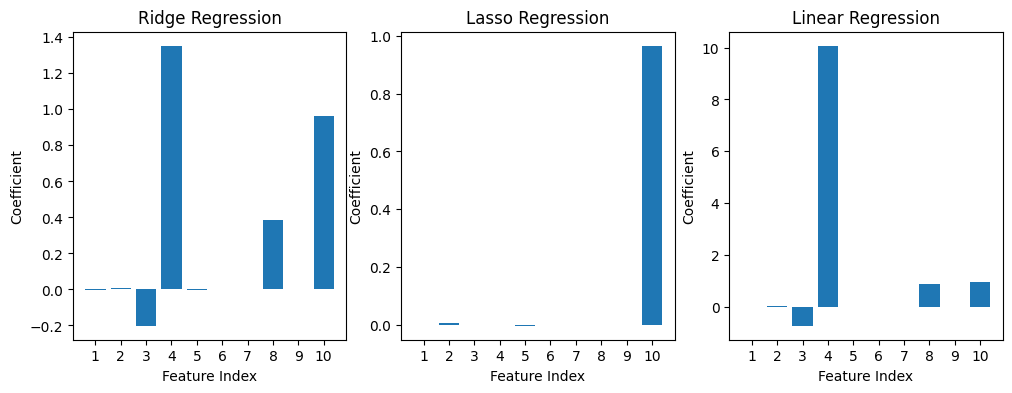

In [73]:
# Create a figure with subplots for each model
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
model_info['Ridge']['coefficients'] = model_info['Ridge']['model'].coef_
model_info['Lasso']['coefficients'] = model_info['Lasso']['model'].coef_
model_info['LinearRegression']['coefficients'] = model_info['LinearRegression']['model'].coef_

# Plot coefficients for Ridge model
ridge_coefs = model_info['Ridge']['coefficients'] 
axes[0].bar(range(len(ridge_coefs)), ridge_coefs)
axes[0].set_xticks(range(len(ridge_coefs)))
axes[0].set_xticklabels(range(1, len(ridge_coefs)+1))
axes[0].set_xlabel('Feature Index')
axes[0].set_ylabel('Coefficient')
axes[0].set_title('Ridge Regression')

# Plot coefficients for Lasso model
lasso_coefs = model_info['Lasso']['coefficients']
axes[1].bar(range(len(lasso_coefs)), lasso_coefs)
axes[1].set_xticks(range(len(lasso_coefs)))
axes[1].set_xticklabels(range(1, len(lasso_coefs)+1))
axes[1].set_xlabel('Feature Index')
axes[1].set_ylabel('Coefficient')
axes[1].set_title('Lasso Regression')

# Plot coefficients for Linear model
linear_coefs = model_info['LinearRegression']['coefficients']
axes[2].bar(range(len(linear_coefs)), linear_coefs)
axes[2].set_xticks(range(len(linear_coefs)))
axes[2].set_xticklabels(range(1, len(linear_coefs)+1))
axes[2].set_xlabel('Feature Index')
axes[2].set_ylabel('Coefficient')
axes[2].set_title('Linear Regression')

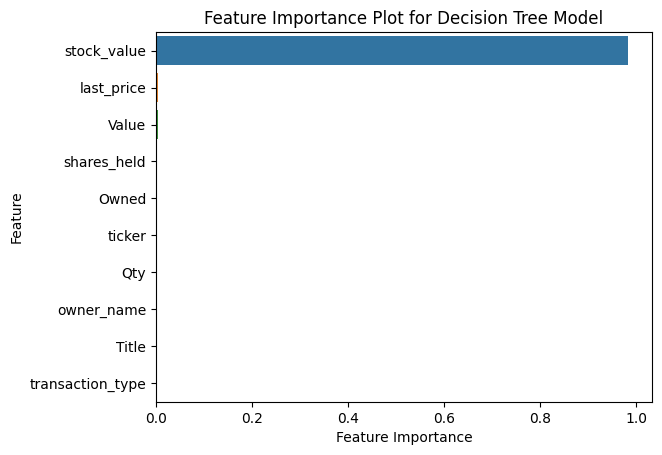

In [74]:
# Get feature importances from the model
feature_importances = model_info['DecisionTreeRegressor']['model'].feature_importances_

# Create a DataFrame to store feature importances
feature_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by feature importances
feature_df = feature_df.sort_values('Importance', ascending=False)

# Create a bar plot to visualize feature importances
sns.barplot(x='Importance', y='Feature', data=feature_df)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot for Decision Tree Model')
plt.show()


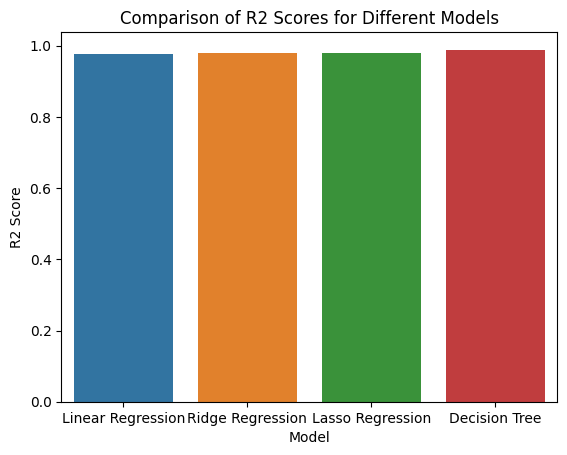

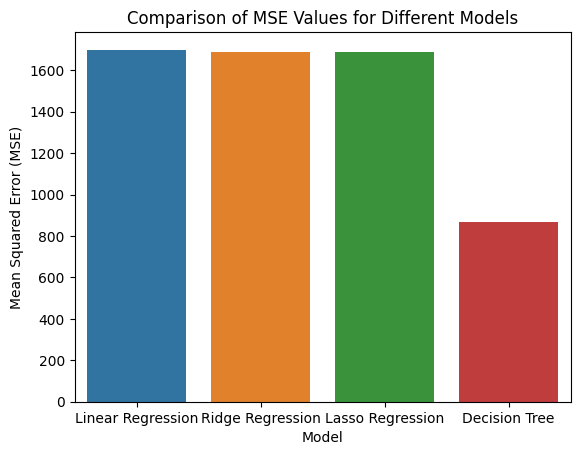

In [75]:
# Create a dictionary to store the performance metrics of each model
model_performance = {
    'Linear Regression': {'R2': model_info['LinearRegression']['r2'], 'MSE': model_info['LinearRegression']['mse']},
    'Ridge Regression': {'R2':  model_info['Ridge']['r2'], 'MSE':  model_info['Ridge']['mse']},
    'Lasso Regression': {'R2': model_info['Lasso']['r2'], 'MSE': model_info['Lasso']['mse']},
    'Decision Tree': {'R2':  model_info['DecisionTreeRegressor']['r2'], 'MSE': model_info['DecisionTreeRegressor']['mse']}
}

# Convert the dictionary to a DataFrame
model_df = pd.DataFrame(model_performance).T

# Create a bar plot to compare R2 scores
sns.barplot(x=model_df.index, y=model_df['R2'])
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.title('Comparison of R2 Scores for Different Models')
plt.show()

# Create a bar plot to compare MSE values
sns.barplot(x=model_df.index, y=model_df['MSE'])
plt.xlabel('Model')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of MSE Values for Different Models')
plt.show()


In [76]:
check_null_values(test_data)
check_empty_values(test_data)
check_nan_values(test_data)

No columns contain null values.
No columns contain empty values.
No numerical columns contain NaN values.


In [77]:
# Split the strings on commas and create a list of values for each cell
test_data['Title'] = test_data['Title'].str.lower()
test_data['Title'] = test_data['Title'].str.split(',')
#Clean_array will remove the co- start from each title
test_data['Title'] = test_data['Title'].apply(clean_array)
replace_to_string_for_array('cob',df=test_data['Title'],optional='chair')
replace_to_string_for_array('pres',df=test_data['Title'])
replace_to_string_for_array('vp',df=test_data['Title'],not_optional='evp')
replace_to_initials_for_array('chief',test_data['Title'])
test_data['Title'] = test_data['Title'].apply(replace_title_with_rank)

<ipython-input-57-756befde8387>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = new_array
<ipython-input-57-756befde8387>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = new_array
<ipython-input-57-756befde8387>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = new_array


In [78]:
test_data['Qty']= test_data['Qty'].str.replace(",", "").astype(float)
test_data['shares_held']= test_data['shares_held'].str.replace(",", "").astype(int)
test_data["Owned"] = test_data["Owned"].str.replace("%", "").replace("New",0)
test_data['Owned'] = test_data['Owned'].str.replace('>',"").astype(float)
# Divide by 100
test_data["Owned"] = test_data["Owned"]/100
test_data['Value'] = test_data['Value'].str.replace("$", "")
test_data['Value'] = test_data['Value'].str.replace(",", "").astype(int)

<ipython-input-78-fa3b1365255d>:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  test_data['Value'] = test_data['Value'].str.replace("$", "")


In [79]:
test_data['transaction_type'] = test_data['transaction_type'].apply(replace_p_s_with_1_0)
test_data['ticker'] = replace_items(test_data['ticker'],encoded_values_ticker)
test_data['owner_name'] = replace_items(test_data['owner_name'],encoded_values_owner_name)
test_data=test_data.drop(columns_to_drop, axis=1)


In [80]:
test_data

,ticker,owner_name,Title,transaction_type,last_price,Qty,shares_held,Owned,Value,stock_value,30_days_later
1846,579,1184,2,0,145.94,-6500.0,143790,-0.04,-948597,146.309998,162.559998
1435,35,167,5,0,98.60,-300.0,36440,-0.01,-29580,98.809998,104.930000
10,10,10,3,0,147.72,-1442.0,77300,-0.02,-213017,141.789993,118.089996
11,11,11,5,0,1160.85,-1100.0,22905,-0.05,-1276940,362.706665,297.046661
264,161,217,2,0,140.22,-2000.0,157617,-0.01,-280440,133.220001,122.980003
...,...,...,...,...,...,...,...,...,...,...,...
1183,468,807,3,0,80.00,-3164.0,49303,-0.06,-253120,81.010002,66.709999
1724,542,992,4,0,109.38,-846.0,12275,-0.06,-92535,109.750000,116.400002
788,31,31,5,0,50.31,-10200.0,2123999,0.00,-513162,49.349998,47.180000
1295,343,889,5,0,71.53,-5412.0,65132,-0.08,-387131,71.680000,61.680000


In [81]:
check_null_values(test_data)
check_empty_values(test_data)
check_nan_values(test_data)

No columns contain null values.
No columns contain empty values.
No numerical columns contain NaN values.


In [82]:
test_data = replace_missing_values(test_data)
test_data

,ticker,owner_name,Title,transaction_type,last_price,Qty,shares_held,Owned,Value,stock_value,30_days_later
1846,579,1184,2,0,145.94,-6500.0,143790,-0.04,-948597,146.309998,162.559998
1435,35,167,5,0,98.60,-300.0,36440,-0.01,-29580,98.809998,104.930000
10,10,10,3,0,147.72,-1442.0,77300,-0.02,-213017,141.789993,118.089996
11,11,11,5,0,1160.85,-1100.0,22905,-0.05,-1276940,362.706665,297.046661
264,161,217,2,0,140.22,-2000.0,157617,-0.01,-280440,133.220001,122.980003
...,...,...,...,...,...,...,...,...,...,...,...
1183,468,807,3,0,80.00,-3164.0,49303,-0.06,-253120,81.010002,66.709999
1724,542,992,4,0,109.38,-846.0,12275,-0.06,-92535,109.750000,116.400002
788,31,31,5,0,50.31,-10200.0,2123999,0.00,-513162,49.349998,47.180000
1295,343,889,5,0,71.53,-5412.0,65132,-0.08,-387131,71.680000,61.680000


In [83]:
test_X = test_data.drop('30_days_later', axis=1)  
test_y = test_data['30_days_later']  

for model_name, model in model_info.items():
    model_obj = model['model']
    
    y_pred = model_obj.predict(test_X)
    
    mse = mean_squared_error(test_y, y_pred)
    rmse = np.sqrt(mse)
    
    print("Model: {}".format(model_name))
    print("Mean Squared Error (MSE) on Test Data: {:.2f}".format(mse))
    print("Root Mean Squared Error (RMSE) on Test Data: {:.2f}".format(rmse))
    print("---")



Model: LinearRegression
Mean Squared Error (MSE) on Test Data: 1335.66
Root Mean Squared Error (RMSE) on Test Data: 36.55
---
Model: Ridge
Mean Squared Error (MSE) on Test Data: 1304.55
Root Mean Squared Error (RMSE) on Test Data: 36.12
---
Model: Lasso
Mean Squared Error (MSE) on Test Data: 1304.20
Root Mean Squared Error (RMSE) on Test Data: 36.11
---
Model: DecisionTreeRegressor
Mean Squared Error (MSE) on Test Data: 1295.98
Root Mean Squared Error (RMSE) on Test Data: 36.00
---


In [84]:
import joblib
import os



# Loop through the models in 'model_info' dictionary
for model_name, model in model_info.items():
    # Extract the model from the dictionary
    model_obj = model['model']
    
    # Save the model to a binary file
    file_name = "{}.joblib".format(model_name) # File name for the model
    file_path = os.path.join(drive_path[:-1], file_name)
    joblib.dump(model_obj, file_name) # Save the model to file
    print("Model '{}' saved as {}".format(model_name, file_name))


Model 'LinearRegression' saved as LinearRegression.joblib
Model 'Ridge' saved as Ridge.joblib
Model 'Lasso' saved as Lasso.joblib
Model 'DecisionTreeRegressor' saved as DecisionTreeRegressor.joblib


In [85]:
import pickle

def save_dicts_to_file(dict1, dict2, file_path):
    with open(file_path, 'wb') as f:
        pickle.dump([dict1, dict2], f)


save_dicts_to_file(encoded_values_owner_name,encoded_values_ticker,'encoded_dicts')
